# Diamond_Price_PyCaret_FastAPI

# Diamond_Price_PyCaret_FastAPI

 ## Importing Required Libraries

In [19]:
# importing pip
!pip install pycaret
!pip install fastapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import numpy as np
import plotly.express as px


# Business Problem

 I using a case study by Darden School of Business, published in Harvard Business. The case is regarding the story of two people who are going to be married in the future. The guy named Greg wanted to buy a ring to propose to a girl named Sarah. The problem is to find the ring Sarah will like, but after a suggestion from his close friend, Greg decides to buy a diamond stone instead so that Sarah can decide her choice. Greg then collects data of <b>6000 diamonds with their price and attributes like cut, color, shape, etc.</b>

# Data

 I am using a dataset from a very popular case study by the Darden School of Business, published in Harvard Business. The goal of this tutorial is to predict the diamond price based on its attributes like carat weight, cut, color, etc. Dataset can be downloaded from the dataset from PyCaret’s repository.

### Loading the dataset from pycaret

In [21]:
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [22]:
#Checking the loaded data
data

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


## Exploratory Data Analysis

In [23]:
#Scatter plot carat_weight and Price
fig = px.scatter(x=data['Carat Weight'], y=data['Price'], 
                 facet_col = data['Cut'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                 trendline_color_override = 'red', title = 'SARAH GETS A DIAMOND - A CASE STUDY')
fig.show()

### Distribution of the Target variable

In [24]:
#plotting histogram
fig = px.histogram(data, x=['Price'], template='plotly_dark', title ='Histogram of Price')
fig.show()

#### Checking with log transformation, to fit in algorithms that asumes normality 

In [25]:
# creating a copy of data
data_copy = data.copy()

In [26]:
# creating a new feature Log_Price
data_copy['Log_Price'] = np.log(data_copy['Price'])

In [27]:
# plot histogram of Log_Price
fig = px.histogram(data_copy, x=data_copy['Log_Price'], template='plotly_dark', title="Histogram of Log_Price")
fig.show()

Log_Price confirms our hypothesis. The transformation will help us to get away with skewness and make the target variable approximately normal. Based on this, we will transform the Price variable before training our models.

## Data Preparation

In [28]:
#Pycaret setup
from pycaret.regression import *
s = setup(data, target='Price', ignore_features=None, transform_target=True) #transform_target to use box-cox transformations

,Description,Value
0,Session id,7657
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


### Model Training & Selection

In [29]:
# Comparing all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,632.0902,1467992.9535,1204.4669,0.9860,0.0654,0.0494,0.6160
lightgbm,Light Gradient Boosting Machine,643.3416,1957662.2422,1381.5569,0.9817,0.0675,0.0492,0.7230
et,Extra Trees Regressor,746.9268,2300468.8105,1497.6879,0.9787,0.0791,0.0596,1.9730
rf,Random Forest Regressor,737.8931,2381412.9179,1524.7887,0.9776,0.0780,0.0576,1.8270
gbr,Gradient Boosting Regressor,774.2698,2424382.6645,1544.7051,0.9769,0.0771,0.0581,0.9810
dt,Decision Tree Regressor,932.7323,3326516.3282,1803.1892,0.9689,0.1011,0.0750,0.3080
ada,AdaBoost Regressor,2065.8952,18639280.4893,4284.7721,0.8261,0.1907,0.1535,0.5470
knn,K Neighbors Regressor,3034.8384,34983533.1369,5904.9600,0.6668,0.3606,0.2318,0.5090
omp,Orthogonal Matching Pursuit,3277.2112,72313777.4086,8341.3757,0.3154,0.2796,0.2190,0.2560
lasso,Lasso Regression,6669.8463,119146118.5376,10886.9511,-0.1226,0.7164,0.5724,0.9300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# checking the residuals of trained model
plot_model(best, plot ='residuals_interactive')

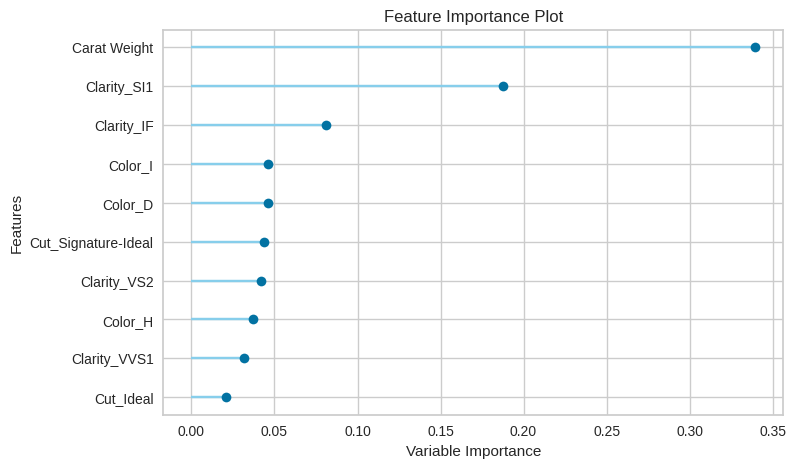

In [31]:
# checking feature importance
plot_model(best, plot = 'feature')


### Finalize and Save Pipeline

In [32]:
# finalize the model
final_best = finalize_model(best)
# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', '...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=n